# Indice de Percepción del Consumidor

Este es un trabajo en progreso, en que se muestra cómo calcular el índice de percepción del consumidor (Ipeco) en base a datos de encuestas a consumidores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

In [3]:
encuesta = pd.read_csv('encuesta.csv')
encuesta.head()

,region,estrato,SEA,SEF,DA,DF,ITF
0,8,1,2,1,1,2,3
1,8,1,1,3,1,1,1
2,8,1,1,1,1,2,2
3,8,1,1,1,1,1,1
4,8,1,1,3,2,1,3


In [4]:
def get_vp(percepciones, preg):
    v1 = (percepciones[preg] == 1)*1
    v2 = (percepciones[preg] == 2)*1
    v3 = (percepciones[preg] == 3)*1
    q = pd.DataFrame({'1':v1, '2':v2, '3':v3})
    v = q.mean(axis=0)
    if (v['1'] + v['3']) > 0:
        p = v['3'] / (v['1'] + v['3'])
    else:
        p = 0
    return v, p

In [7]:
def gen_vp(database, npercepciones):
    Visiones = np.zeros((len(npercepciones),3))
    Percepciones = np.zeros((len(npercepciones),1))
    
    for i in range(len(npercepciones)):
        Visiones[i], Percepciones[i] = get_vp(database, npercepciones[i])

    Visiones = pd.DataFrame(Visiones, index=npercepciones, columns=['Pesimista', 'Neutral', 'Optimista'])
    Percepciones = pd.DataFrame(Percepciones, index=npercepciones, columns=['Indice'])
    
    return Visiones, Percepciones

In [13]:
npercepciones = list(encuesta.columns)[2:]
Visiones, Percepciones = gen_vp(encuesta, npercepciones)

In [46]:
Visiones

,Pesimista,Neutral,Optimista
SEA,0.4571,0.4192,0.1237
SEF,0.2146,0.4091,0.3763
DA,0.7172,0.1389,0.1439
DF,0.3258,0.3990,0.2753
ITF,0.2702,0.4192,0.3106


In [76]:
Percepciones

,Indice
SEA,0.2130
SEF,0.6368
DA,0.1672
DF,0.4580
ITF,0.5348


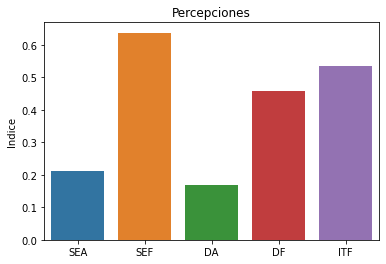

In [80]:
plt.figure()
plt.title('Percepciones')
sns.barplot(x=Percepciones.index, y=Percepciones['Indice']);

In [128]:
Ipeco = Percepciones.mean()
Coyuntura = Percepciones.loc[['SEA', 'DA']].mean()
Expectativas = Percepciones.loc[['SEF', 'DF', 'ITF']].mean()

Indices = [e.values for e in [Ipeco, Coyuntura, Expectativas]]
Indices = pd.DataFrame(Indices, index = ['Ipeco', 'Coyuntura', 'Expectativas'], columns= ['Indices'])
Indices

,Indices
Ipeco,0.4019
Coyuntura,0.1901
Expectativas,0.5432


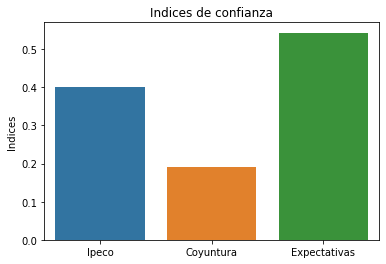

In [131]:
plt.figure()
plt.title('Indices de confianza')
sns.barplot(x=Indices.index, y=Indices['Indices']);

In [63]:
percepciones_estratos = np.zeros((5,5))
estratos = list(pd.unique(encuesta['estrato']))
for e in estratos:
    data = encuesta[encuesta['estrato'] == e]
    _ , percep = gen_vp(data, npercepciones)
    percepciones_estratos[:, e-1] = np.squeeze(percep)

percepciones_estratos = pd.DataFrame(percepciones_estratos, index=npercepciones, columns=['ABC1', 'C2', 'C3', 'D', 'E'])
percepciones_estratos

,ABC1,C2,C3,D,E
SEA,0.3188,0.2200,0.1455,0.1667,0.0714
SEF,0.6226,0.6562,0.6522,0.6429,0.3333
DA,0.0495,0.1975,0.2632,0.2157,0.0000
DF,0.4242,0.4915,0.4516,0.5238,0.2222
ITF,0.5893,0.5410,0.4923,0.5854,0.1429


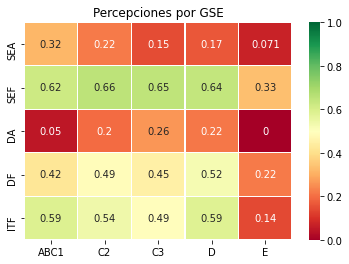

In [67]:
plt.figure()
plt.title('Percepciones por GSE')
sns.heatmap(percepciones_estratos, cmap='RdYlGn', vmin=0, vmax=1, annot=True, linewidths=.25);

In [85]:
confianza_estratos = percepciones_estratos.mean()
confianza_estratos

ABC1   0.4009
C2     0.4213
C3     0.4009
D      0.4269
E      0.1540
dtype: float64

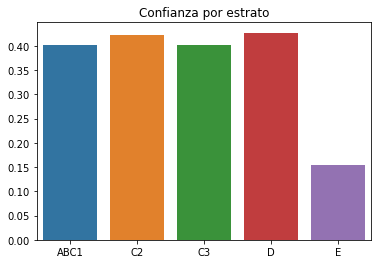

In [89]:
plt.figure()
plt.title('Confianza por estrato')
sns.barplot(x=confianza_estratos.index, y=confianza_estratos);

In [93]:
percepciones_regiones = np.zeros((5,2))
regiones = [8, 13]
for e in range(len(regiones)):
    data = encuesta[encuesta['region'] == regiones[e]]
    _ , percep = gen_vp(data, npercepciones)
    percepciones_regiones[:, e] = np.squeeze(percep)

percepciones_regiones = pd.DataFrame(percepciones_regiones, index=npercepciones, columns=['Bio Bio', 'RM'])
percepciones_regiones

,Bio Bio,RM
SEA,0.1136,0.2300
SEF,0.5294,0.6957
DA,0.0484,0.1724
DF,0.3506,0.5273
ITF,0.4267,0.6105


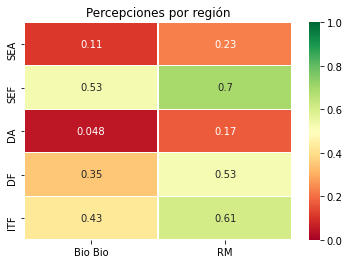

In [94]:
plt.figure()
plt.title('Percepciones por región')
sns.heatmap(percepciones_regiones, cmap='RdYlGn', vmin=0, vmax=1, annot=True, linewidths=.25);

In [95]:
confianza_regiones = percepciones_regiones.mean()
confianza_regiones

Bio Bio   0.2938
RM        0.4472
dtype: float64

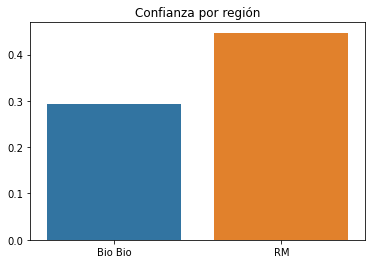

In [96]:
plt.figure()
plt.title('Confianza por región')
sns.barplot(x=confianza_regiones.index, y=confianza_regiones);

# Comparación con serie histórica

In [133]:
historia = pd.read_csv('historia.csv')
historia = historia[['year', 'month', 'ipeco', 'coyuntura', 'expectativas', 'TM', 'sea', 'da', 'sef', 'df', 'iif', 'ipeco8a', 'ipeco13a', 'ABC1', 'C2', 'C3', 'D', 'E']]
historia.tail()

,year,month,ipeco,coyuntura,expectativas,TM,sea,da,sef,df,iif,ipeco8a,ipeco13a,ABC1,C2,C3,D,E
194,2020,5,51.3024,37.1921,56.5564,56.3788,30.3386,52.4391,60.5483,61.0742,49.7046,58.4514,56.8751,50.8137,48.2246,57.8269,44.7941,57.2972
195,2020,6,63.0234,30.0657,75.1615,54.6464,22.1745,47.2821,80.5914,77.6440,68.1880,80.8498,58.8803,49.2261,68.0705,72.1863,65.1897,57.1443
196,2020,7,61.9881,32.7397,72.7744,58.7713,23.8189,52.1691,82.3200,74.8885,61.9567,68.1343,67.2910,53.7218,47.0776,72.6302,71.4467,69.1715
197,2020,8,74.9714,50.8512,83.9227,66.6610,42.0930,70.4241,94.2411,88.6708,70.6512,71.2718,87.6023,68.2765,71.3268,80.6822,80.9505,66.2754
198,2020,9,71.2078,50.5890,78.8766,69.3891,42.3356,69.1046,81.8294,91.0762,68.1334,57.3057,87.2359,63.3333,67.9250,76.0769,83.7956,31.6686


In [113]:
def get_date():
    year = historia['year'].iloc[-1]
    month = historia['month'].iloc[-1]
    if month == 12:
        month = 1
        year += 1
    else:
        month += 1
    return year, month

year, month = get_date()

In [ ]:
En progreso ...